<a href="https://colab.research.google.com/github/HasanTasnimul/PyTorch-Tutorial-YouTube/blob/main/simple_NeuralNetwork_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Create a model class that inherits nn.Module
class Model(nn.Module):
    def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

# Function that will move everything forward
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [ ]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [ ]:
my_df.head()

sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

In [ ]:
my_df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [ ]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
my_df['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
my_df['variety'] = le.fit_transform(my_df['variety'])

In [ ]:
# Train Test Split
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [ ]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [ ]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [ ]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
# Set the criterion of model to measure the erro, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()

# Choose Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [ ]:
print(model.parameters)

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>


In [ ]:
# Train our model
# Epochs? (one run through all the training data in our network)

epochs = 100
losses = []
for i in range(epochs):
    # Go forward and get a prediction
    y_pred = model.forward(X_train)

    # Measure the loss/error
    loss = criterion(y_pred, y_train)

    # Keep track of your losses
    losses.append(loss.detach().numpy())

    # print every 10 epoch
    if i % 10 == 0:
        print(f'Epoch: {i} and Loss: {loss}')

    # Do some backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()




Epoch: 0 and Loss: 1.125203251838684
Epoch: 10 and Loss: 1.0097211599349976
Epoch: 20 and Loss: 0.8162347674369812
Epoch: 30 and Loss: 0.585993230342865
Epoch: 40 and Loss: 0.4003389775753021
Epoch: 50 and Loss: 0.26794716715812683
Epoch: 60 and Loss: 0.1796349585056305
Epoch: 70 and Loss: 0.12165623158216476
Epoch: 80 and Loss: 0.0860651507973671
Epoch: 90 and Loss: 0.06522614508867264


Text(0.5, 0, 'Epochs')

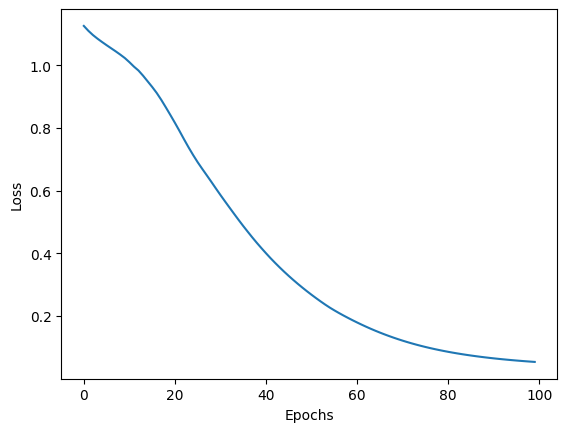

In [ ]:
# Graph it!
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [ ]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)
print(f'Loss: {loss}')

Loss: 0.13146096467971802


In [ ]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)


        print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'We got {correct} correct out of {len(y_test)}')

1.) tensor([-5.8771,  4.4629,  6.5155]) 	 2 	 2
2.) tensor([-7.5451,  4.1668,  9.7293]) 	 2 	 2
3.) tensor([-8.4517,  5.1275, 10.2015]) 	 2 	 2
4.) tensor([-4.3411,  5.6280,  2.5636]) 	 1 	 1
5.) tensor([-7.1838,  4.8757,  8.3023]) 	 2 	 2
6.) tensor([-3.3940,  5.3421,  1.2802]) 	 1 	 1
7.) tensor([-5.9240,  4.9826,  6.0025]) 	 2 	 2
8.) tensor([-4.2895,  5.7016,  2.3920]) 	 1 	 1
9.) tensor([-6.5369,  4.9261,  7.1291]) 	 2 	 2
10.) tensor([-8.0526,  4.4129, 10.3325]) 	 2 	 2
11.) tensor([-5.6775,  4.9505,  5.6248]) 	 2 	 2
12.) tensor([ 4.5748, -2.2579, -2.8925]) 	 0 	 0
13.) tensor([ 4.2646, -2.0055, -2.7342]) 	 0 	 0
14.) tensor([-2.1081,  4.0482,  0.5803]) 	 1 	 1
15.) tensor([ 3.4608, -1.2147, -2.3488]) 	 0 	 0
16.) tensor([-5.4739,  5.1174,  5.0966]) 	 2 	 1
17.) tensor([ 4.0637, -1.8045, -2.6504]) 	 0 	 0
18.) tensor([-5.8090,  4.6057,  6.2494]) 	 1 	 2
19.) tensor([ 4.9250, -2.5763, -3.0545]) 	 0 	 0
20.) tensor([ 3.4559, -1.2559, -2.3637]) 	 0 	 0
21.) tensor([-2.6161,  4.5584

In [ ]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [ ]:
with torch.no_grad():
   print(model(new_iris))

tensor([ 4.5445, -2.2478, -2.8698])


In [ ]:
# Print the state_dict of the model
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Model's state_dict:
fc1.weight 	 torch.Size([8, 4])
fc1.bias 	 torch.Size([8])
fc2.weight 	 torch.Size([9, 8])
fc2.bias 	 torch.Size([9])
out.weight 	 torch.Size([3, 9])
out.bias 	 torch.Size([3])


In [ ]:
# Save our NN Model
torch.save(model.state_dict(), 'awesome_iris.pt')

In [ ]:
# Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('awesome_iris.pt'))

<All keys matched successfully>

In [ ]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)